<a href="https://colab.research.google.com/github/JesmirData/Portfolio/blob/main/FuncionConfiabilidad_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO DE CIENCIA DE DATOS - ESTADISTICA WEIBULL - PREDICCION

In [1]:
#se instala libreria de Confiabilidad

!pip install reliability


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.2/257.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 17.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=3bc05d7a805aa93766fd59507f334cc8b75dd0dfdf34e9913035c6afa850c1ee
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:

In [5]:
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade reliability

In [6]:
!pip install --upgrade --force-reinstall numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [1]:
from reliability.Fitters import Fit_Weibull_2P, Fit_Weibull_3P #modelos teoricos
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt
from reliability.Distributions import Weibull_Distribution #funcion de distribucion

import numpy as np
import pandas as pd

In [2]:
# Metodo de Monte Carlo - Depende de numeros aleatorios [0,1]

a = 30 # eEscala de vida caracteristica
b = 2.5 # forma
g = 100 # loc

dist = Weibull_Distribution(alpha=a, beta=b, gamma=g) #create the distribution object

In [3]:
# Definir cuantos Datos tbf (estado operativo - time between failure: tbf)
# seed = 1

Data = dist.random_samples(500, seed = 1) #500
Data.shape

(500,)

In [4]:
# Visualizar los elementos dentro de data
Data[:7]

array([123.43969252, 133.05263625, 100.79517617, 119.93647671,
       114.36688212, 111.79293348, 115.95015052])

In [5]:
# La tabla de llama Tiempos
# TBF Time Between Failure : Tiempo entre fallas

tiempos = pd.DataFrame(Data, columns=['TBF'])
tiempos.head()

,TBF
0,123.44
1,133.053
2,100.795
3,119.936
4,114.367


In [6]:
# Se exportan los datos

tiempos.to_excel('tbf.xlsx', index=False)

# HISTOGRAMA

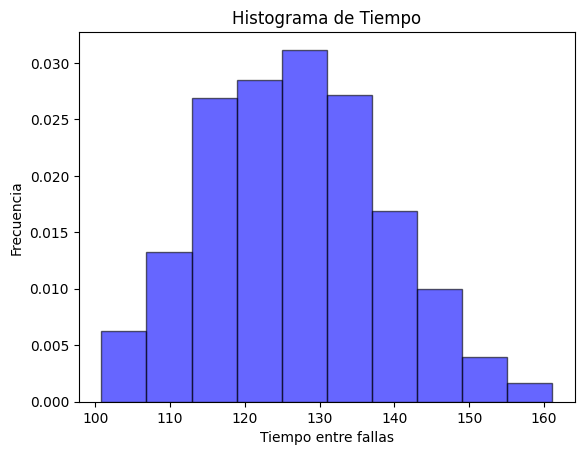

In [7]:
# se plotean las observaciones en el Histograma

inter = 10

# Histogram of data

plt.hist(Data, bins= inter, density= True, alpha= 0.6, color='b',edgecolor='black')
plt.xlabel('Tiempo entre fallas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo')
plt.show()

# ESTIMACION DE PARAMETRO

EL OBJETIVO ES AJUSTAR LOS DATOS A UN MODELO WB DE 3P

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 500/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         32.7547        0.570536   31.6554   33.8923
     Beta         2.70147       0.0954653    2.5207   2.89521
    Gamma         97.7134         1.73009   94.3807   101.164 

Goodness of fit    Value
 Log-likelihood -1932.11
           AICc  3870.27
            BIC  3882.87
             AD 0.339116 



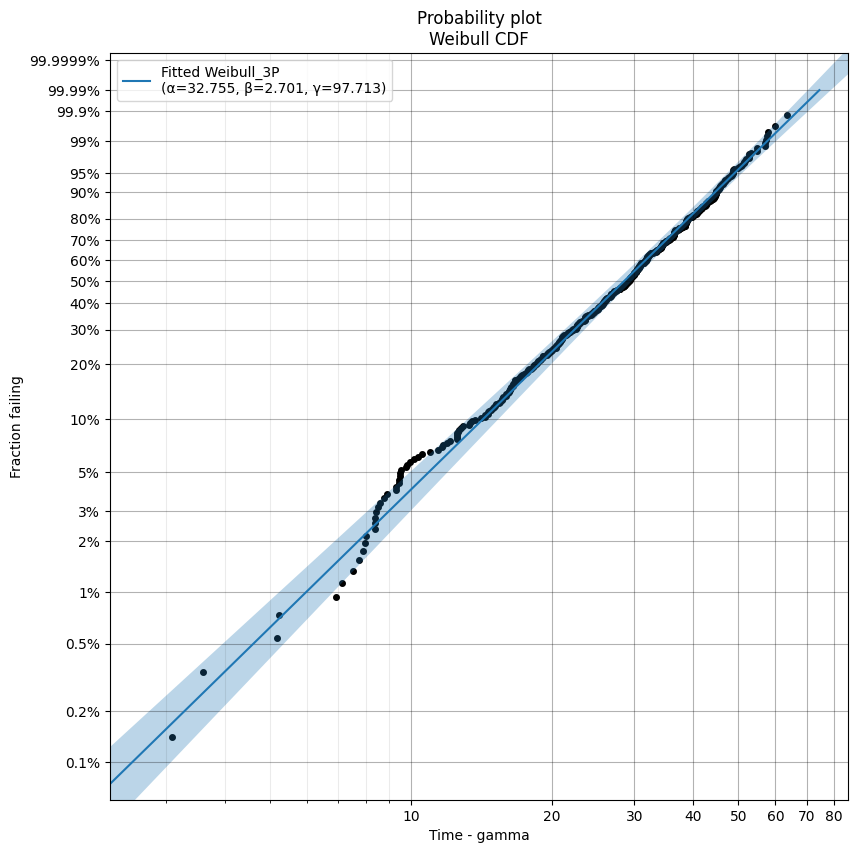

In [8]:
# ajuste de datos para determinar los parametros
# el modelo weibull se llama 'fit'
# print_result = true

fit = Fit_Weibull_3P(Data, print_results=True)



# OTRA FORMA DE CALCULAR LOS PARAMETROS WEIBULL USANDO LA LIBRERIA SCIPY

In [11]:
from scipy.stats import weibull_min

# fit the data to a weibull distribution

shape, loc, scale = weibull_min.fit(Data)

# print the estimated parameters

print("Shape:", shape)
print("Location:", loc)
print("Scale:", scale)


Shape: 2.7014751285966074
Location: 97.71340203629985
Scale: 32.754801424953754


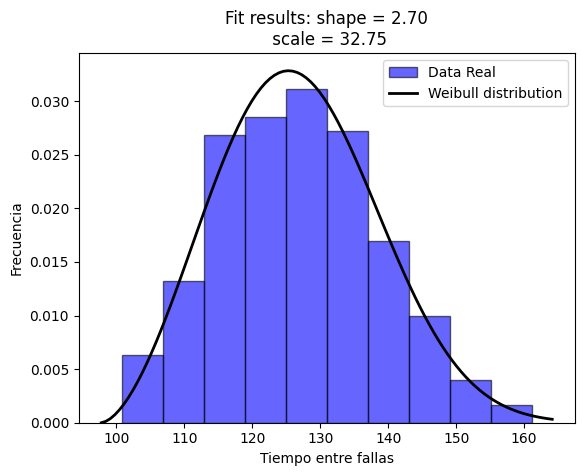

In [20]:
#Histogram of the data

plt.hist(Data, bins= inter, density= True, alpha= 0.6, color='b',edgecolor='black', label='Data Real')
plt.xlabel('Tiempo entre fallas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo')

#PDF of the weibull distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = weibull_min.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', lw=2, label='Weibull distribution')

title = "Fit results: shape = %.2f\n scale = %.2f" % (shape, scale)
plt.title(title)
plt.legend()
plt.show()


In [23]:
#Calculo de Falla entre dos limites

pmin = weibull_min.cdf(120, shape, loc, scale)
pmax = weibull_min.cdf(130, shape, loc, scale)

pmax-pmin

np.float64(0.320133428745085)

# GRAFICO DE CONFIABILIDAD

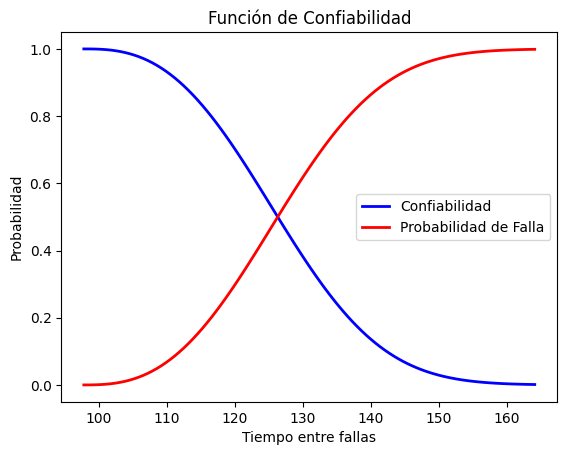

In [25]:
#survival function (reliability function)  / función de supervivencia (función de confiabilidad)

y_reliability = weibull_min.sf(x, shape, loc, scale) #Confiabilidad
y_probfalla = weibull_min.cdf(x, shape, loc, scale) #Probabilidad de Falla

#reliability function / Funcion de Confiabilidad

plt.plot(x, y_reliability, 'b-', linewidth=2, label ='Confiabilidad' )
plt.plot(x, y_probfalla, 'r-', linewidth=2, label ='Probabilidad de Falla')
plt.xlabel('Tiempo entre fallas')
plt.ylabel('Probabilidad')
plt.title('Función de Confiabilidad')
plt.legend()
plt.show()